In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
csv_path = '/content/drive/MyDrive/3rd_Year/3rd_Year_Extra_Learning/DA_MindX/DA_MINDX_Term_3/Bank Customer Churn Prediction.csv'

In [14]:
import pandas as pd
df = pd.read_csv(csv_path)
df.head()  # Display first few rows

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Check data info
# and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


**2. Data Cleaning & Preprocessing**


In [16]:
df = df.drop(columns=['customer_id'])

In [17]:
# One-hot encode 'country' and 'gender'
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

In [18]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**3. Split Data and Scale Features**


In [19]:
# 3.1 Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [20]:
# 3.2 Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
# 3.3 Scale numerical features
from sklearn.preprocessing import StandardScaler

numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

**4. Build & Train a Model**


In [22]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_pred = model.predict(X_test)

**5. Evaluate Model Performance**


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.808
Confusion Matrix:
 [[1540   53]
 [ 331   76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**6. Interpretation & Next Steps**

* Interpretation
Accuracy: 0.808


Your model correctly predicts churn status for about 81% of customers.

Confusion Matrix:
True Negatives (1540): Non-churners correctly predicted.
False Positives (53): Non-churners incorrectly predicted as churners.
False Negatives (331): Churners incorrectly predicted as non-churners.
True Positives (76): Churners correctly predicted.
Precision, Recall, F1-score:

For churners (1):
Precision: 0.59 (When the model predicts churn, it’s correct 59% of the time.)
Recall: 0.19 (Only 19% of actual churners are detected.)
F1-score: 0.28 (Low, indicating poor performance for churners.)
For non-churners (0): Much better scores.
Conclusion:

Your model is good at identifying non-churners, but poor at catching churners (which is the main business interest).

**6. Train a Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest (baseline) Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest (baseline) Accuracy: 0.864
Confusion Matrix:
 [[1541   52]
 [ 220  187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



**7. Random Forest with class_weight='balanced'**

In [26]:
rf_model_bal = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_model_bal.fit(X_train, y_train)

y_pred_rf_bal = rf_model_bal.predict(X_test)

print("Random Forest (class_weight='balanced') Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_bal))

Random Forest (class_weight='balanced') Accuracy: 0.86
Confusion Matrix:
 [[1542   51]
 [ 229  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



**8. SMOTE Oversampling + Random Forest**

In [31]:
# 3.1 Install imbalanced-learn if needed
!pip install imbalanced-learn

In [28]:
# 3.2 Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [30]:
# 3.3 Train Random Forest on SMOTE data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote = rf_model_smote.predict(X_test)

print("Random Forest (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))

Random Forest (SMOTE) Accuracy: 0.8405
Confusion Matrix:
 [[1444  149]
 [ 170  237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.61      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



**9. Threshold Tuning for Optimal Recall/Precision**


In [33]:
# 4.1 Get prediction probabilities
y_proba = rf_model_smote.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)

In [34]:
# 4.2 Try a lower threshold (e.g., 0.3)
import numpy as np

threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print("Random Forest (SMOTE, threshold=0.3) Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Random Forest (SMOTE, threshold=0.3) Accuracy: 0.739
Confusion Matrix:
 [[1158  435]
 [  87  320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82      1593
           1       0.42      0.79      0.55       407

    accuracy                           0.74      2000
   macro avg       0.68      0.76      0.68      2000
weighted avg       0.83      0.74      0.76      2000



**10. Analyze Feature Importance**

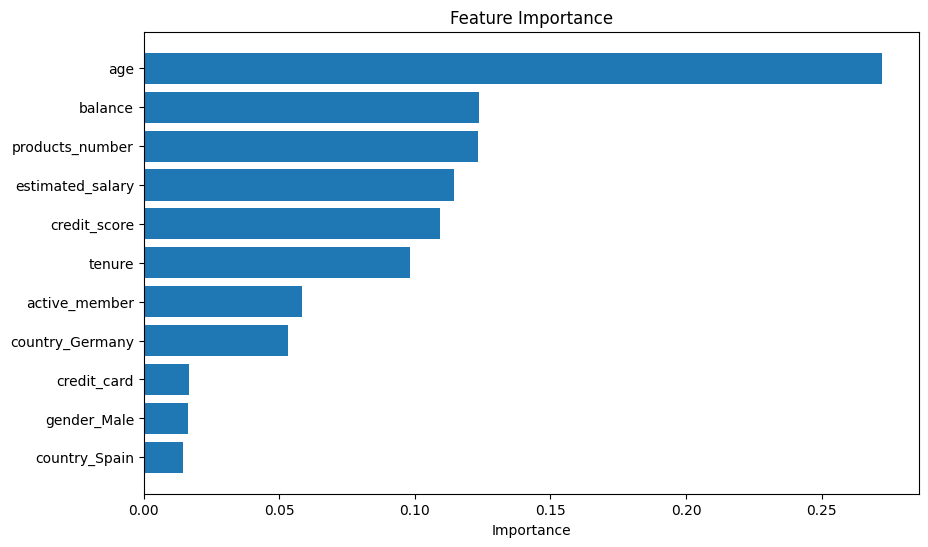

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances from the best model (e.g., rf_model_smote)
importances = rf_model_smote.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**11. Plot Precision-Recall Curve**


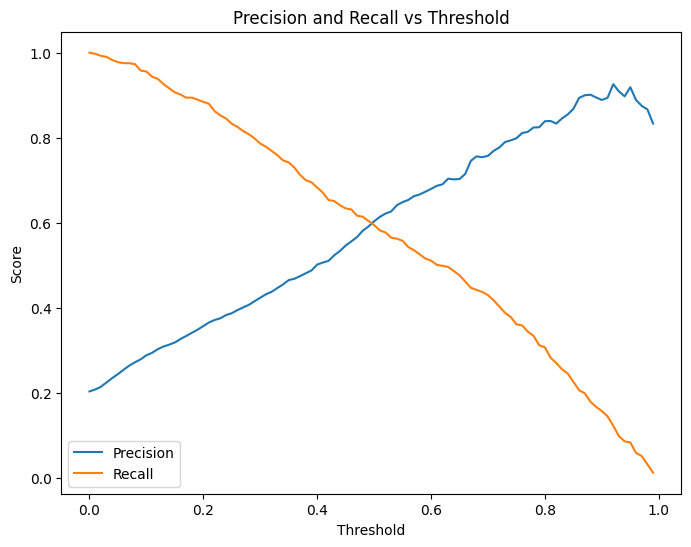

In [36]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

**12. Cross-Validation**

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model_smote, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validated F1 scores: [0.82855957 0.89398734 0.91561665 0.91325946 0.92589763]
Mean F1 score: 0.8954641293614211


**13. Deployment Preparation**

In [38]:
import joblib

joblib.dump(rf_model_smote, 'rf_model_smote.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']